In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Project/WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Business Understanding

Churn Prediction

* identifying customers who are likely to cancel their contracts soon.

* If the company can do that, it can handle users before churn

* The target variable that we want to predict is categorical and has only two possible outcomes: churn or not churn (Binary Classification).

* We also would like to understand why the model thinks our customers churn, and for that, we need to be able to interpret the model’s predictions.

* The dataset has the following information:

  1. Services of the customers: phone; multiple lines; internet; tech support and extra services such as online security, backup, device protection, and TV streaming
  2. Account information: how long they have been clients, type of contract, type of payment method
  3. Charges: how much the client was charged in the past month and in total
  4. Demographic information: gender, age, and whether they have dependents or a partner
  5. Churn: yes/no, whether the customer left the company within the past month

# EDA


In [4]:
df.head()

,Column1,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Column1           7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.shape

(7043, 21)

In [7]:
df.columns

Index(['Column1', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2280.732657
std,0.368612,24.559481,30.090047,2266.129599
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,400.150000
50%,0.000000,29.000000,70.350000,1395.050000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df.isna().sum().sum()

0

In [10]:
df['TotalCharges'].isna().sum()

0

Our Data Didn't have any Null Values


In [11]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [12]:
df.duplicated().sum()

0

<ipython-input-19-771f9e18b8bd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df['MonthlyCharges'], palette='Blues', orient='h')


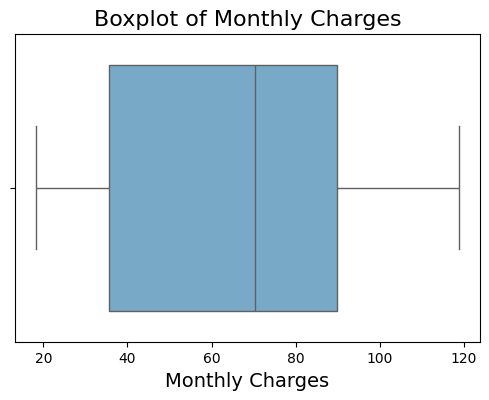

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with the specified background color
plt.figure(figsize=(6, 4))  # Set figure background to #E6E6E6

# Create the boxplot
ax = sns.boxplot(data=df['MonthlyCharges'], palette='Blues', orient='h')

# Set the title and labels (optional)
plt.title('Boxplot of Monthly Charges', fontsize=16)
plt.xlabel('Monthly Charges', fontsize=14)

# Show the plot
plt.show()

<ipython-input-20-18a2d215efb0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df['tenure'],palette='Blues',orient='h')


<Axes: xlabel='tenure'>

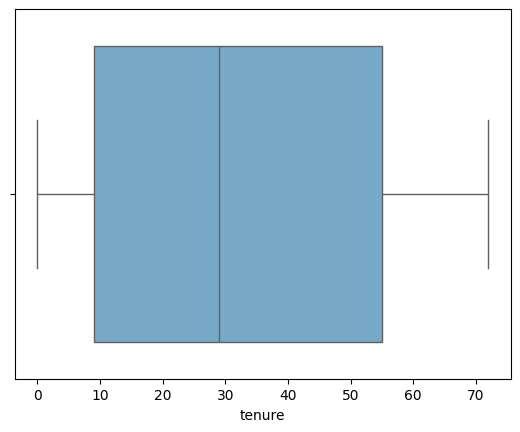

In [20]:
sns.boxplot(data=df['tenure'],palette='Blues',orient='h')

We Don't Have Any Outliers in our Data


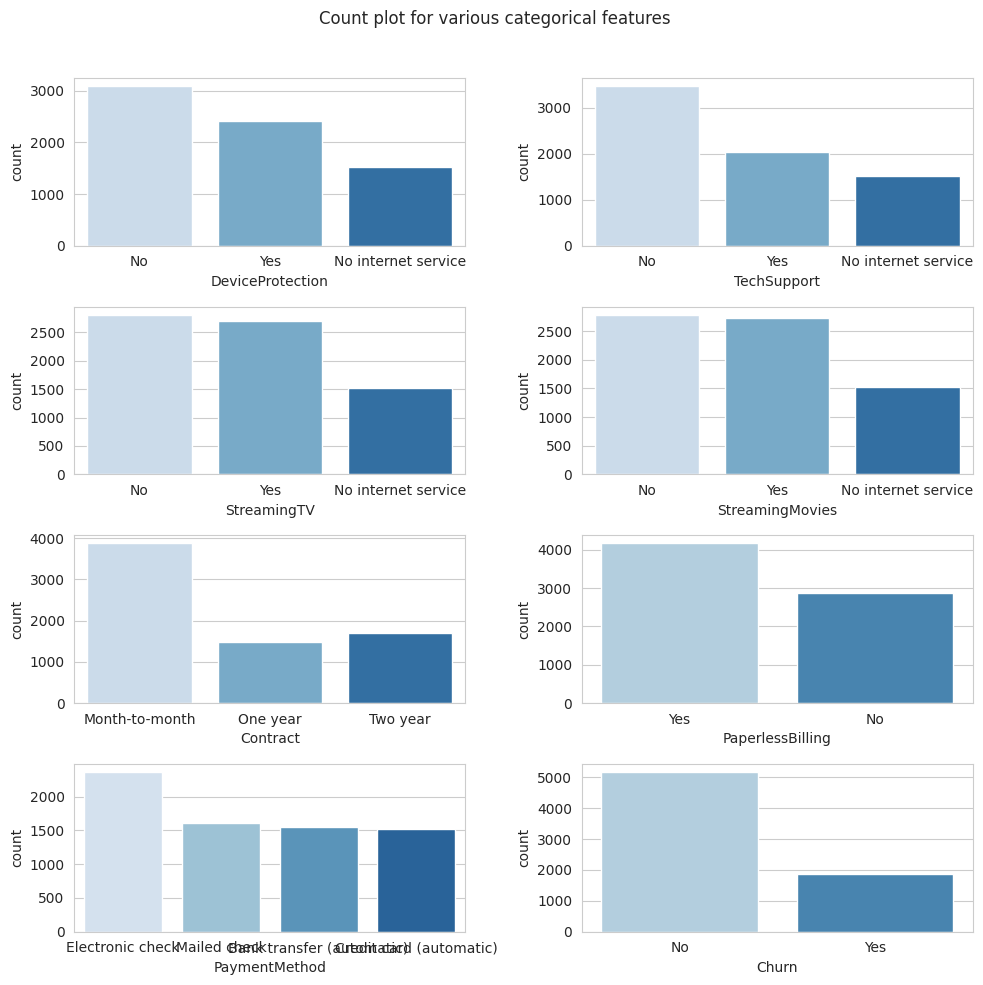

In [23]:
# Set up the grid for plotting
fig, axes = plt.subplots(4, 2, figsize=(10, 10))
sns.set_style('whitegrid')
fig.suptitle("Count plot for various categorical features")

# Use a Seaborn color palette
custom_palette = 'Blues'  # You can change this to any other palette

# Update count plots to include hue and disable legend
sns.countplot(ax=axes[0, 0], data=df, x='DeviceProtection', palette=custom_palette, hue='DeviceProtection', legend=False)
sns.countplot(ax=axes[0, 1], data=df, x='TechSupport', palette=custom_palette, hue='TechSupport', legend=False)
sns.countplot(ax=axes[1, 0], data=df, x='StreamingTV', palette=custom_palette, hue='StreamingTV', legend=False)
sns.countplot(ax=axes[1, 1], data=df, x='StreamingMovies', palette=custom_palette, hue='StreamingMovies', legend=False)
sns.countplot(ax=axes[2, 0], data=df, x='Contract', palette=custom_palette, hue='Contract', legend=False)
sns.countplot(ax=axes[2, 1], data=df, x='PaperlessBilling', palette=custom_palette, hue='PaperlessBilling', legend=False)
sns.countplot(ax=axes[3, 0], data=df, x='PaymentMethod', palette=custom_palette, hue='PaymentMethod', legend=False)
sns.countplot(ax=axes[3, 1], data=df, x='Churn', palette=custom_palette, hue='Churn', legend=False)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

Some analysis

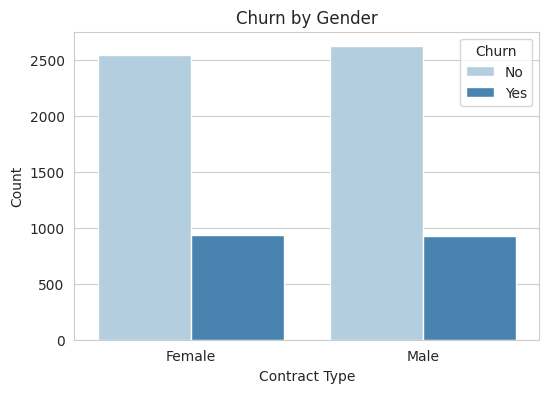

In [24]:
# Churn by gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', hue='Churn', palette='Blues')
plt.title('Churn by Gender')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

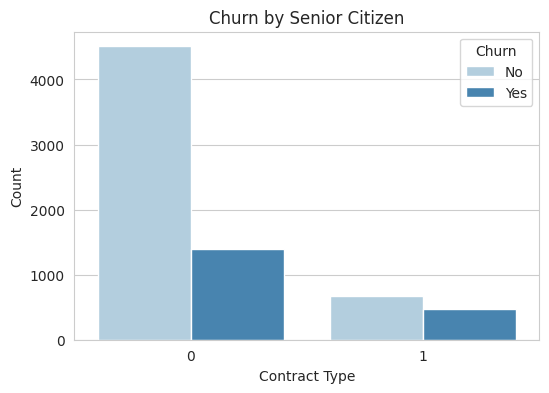

In [25]:
# Churn by senior citizen
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette='Blues')
plt.title('Churn by Senior Citizen')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

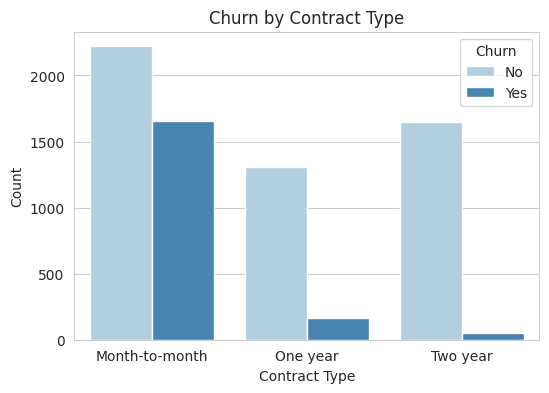

In [26]:
# Churn by contract type
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Contract', hue='Churn', palette='Blues')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

Contract Type: Customers with month-to-month contracts had a significantly higher churn rate compared to those on one-year or two-year contracts. This suggests that customers with more flexibility in their contracts are more likely to leave, possibly due to lack of commitment.

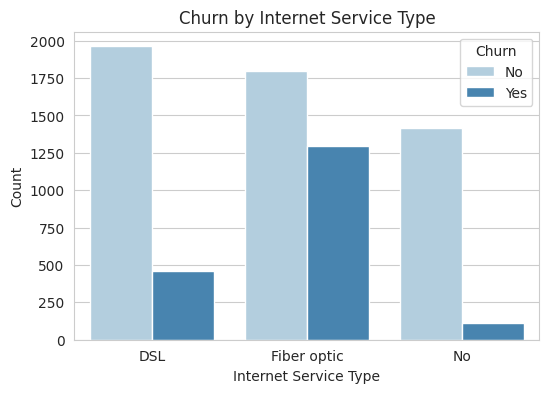

In [27]:
# Churn by Internet Service Type
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='Blues')
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

Internet Service Type: Customers using DSL (Digital Subscriber Line) services had a lower churn rate compared to those using fiber optic services. While fiber optic offers faster speeds, it may also be more expensive, prompting customers to churn when they find more affordable options.

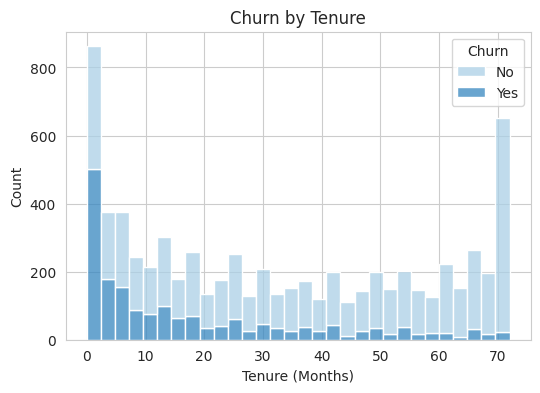

In [28]:
# Churn by Tenure
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', palette='Blues', bins=30)
plt.title('Churn by Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()

Customer Tenure: Long-term customers (those with more than two years of tenure) had a significantly lower churn rate than new customers. This suggests that once customers stay beyond a certain point, they are more likely to remain loyal to the company. Efforts to engage and retain customers during their first few months could be crucial.

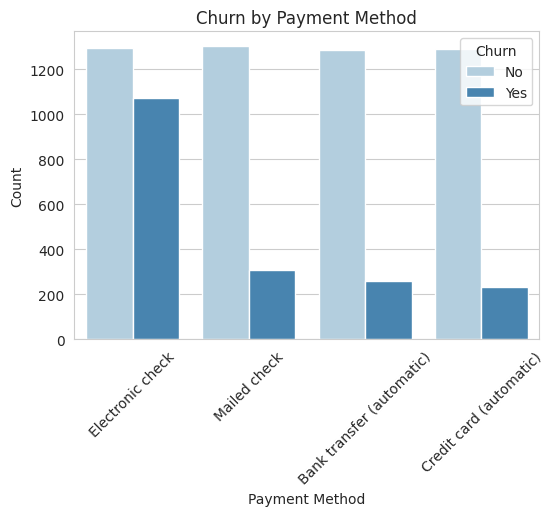

In [29]:
# Churn by Payment Method
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='Blues')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.show()

Customers using automatic payment methods have lower churn rates, while those using Electronic Check experience higher churn, indicating that improving payment convenience can enhance customer retention.

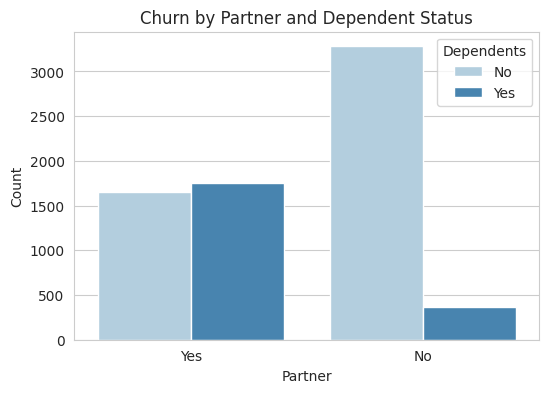

In [30]:
# Churn by Partner and Dependent Status
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Partner', hue='Dependents', palette='Blues')
plt.title('Churn by Partner and Dependent Status')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.legend(title='Dependents')
plt.show()

Partner and Dependent Status: Customers without partners or dependents churned at a higher rate. This could imply that customers living alone or with fewer obligations might be more price-sensitive or more likely to switch services frequently.

<ipython-input-31-b9ef3447463b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Blues')


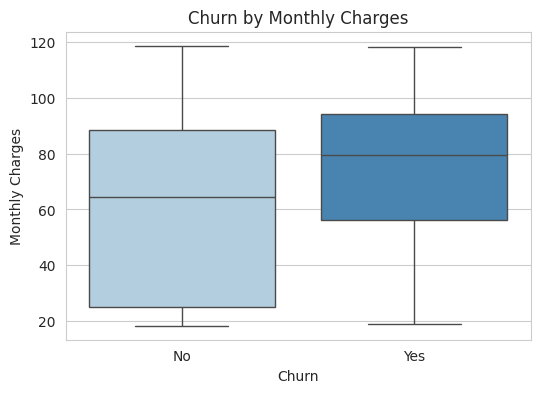

In [31]:
# Churn by Monthly Charges
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Blues')
plt.title('Churn by Monthly Charges')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

Monthly Charges: Customers with higher monthly charges were found to churn more frequently. This indicates that pricing plays a significant role in customer decisions, particularly when they perceive a lack of value for money. Offering value-added services or flexible pricing plans for high-paying customers could mitigate this churn risk.

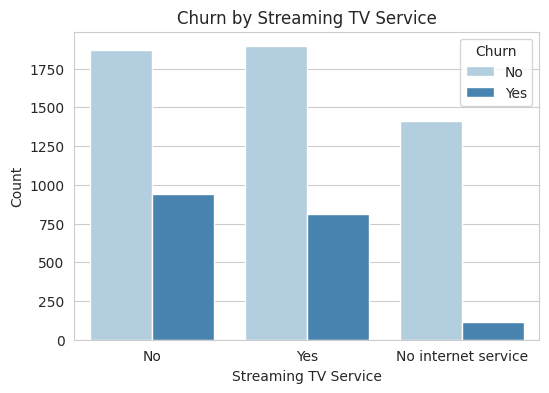

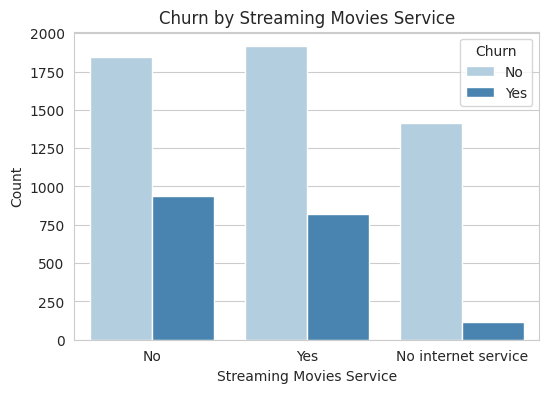

In [32]:
# Churn by Streaming TV and Movies Services
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='StreamingTV', hue='Churn', palette='Blues')
plt.title('Churn by Streaming TV Service')
plt.xlabel('Streaming TV Service')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='StreamingMovies', hue='Churn', palette='Blues')
plt.title('Churn by Streaming Movies Service')
plt.xlabel('Streaming Movies Service')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

Streaming Services: Customers who subscribed to both streaming TV and movies churned more often than those without streaming services. This might indicate dissatisfaction with entertainment service quality or pricing.

In [33]:
# Number of records where individuals churned
n_Churn = df[df['Churn'] == "Yes"].shape[0]

# Number of records where individuals did not churn
n_notChurn = df[df['Churn'] == "No"].shape[0]

# Total number of records
total_records = df.shape[0]

# Percentage of individuals who did not churn
percent_Not_Churn = (n_notChurn / total_records) * 100
# Percentage of individuals who did churn
percent_Churn = (n_Churn / total_records) * 100

print("Churn: {}".format(n_Churn))
print("Not Churn: {}".format(n_notChurn))
print("Percentage of churn {:.2f}%".format(percent_Churn))
print("Percentage of non-churn {:.2f}%".format(percent_Not_Churn))


Churn: 1869
Not Churn: 5174
Percentage of churn 26.54%
Percentage of non-churn 73.46%


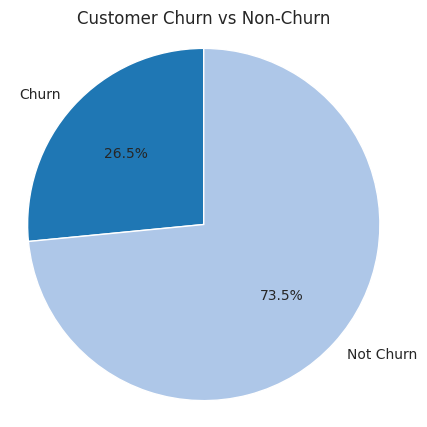

In [34]:
import matplotlib.pyplot as plt

# Data for churn and non-churn
labels = ['Churn', 'Not Churn']
sizes = [n_Churn, n_notChurn]

# Define a color palette of blues
colors = ['#1f77b4', '#aec7e8']  # Dark blue and light blue

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
        wedgeprops={'edgecolor': 'white'}, colors=colors)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.title("Customer Churn vs Non-Churn")
plt.show()

This Indicate That Our Data is not balanced


Conclusion:

1- Non_Chrun are more than Chrun the data is unbalanced.


Problems we have:

1- Handling Nulls

2- Encoding Categorical Columns

3- Feature Selection

4- Making the dataset more balanced because our model will biased to Non_Chrun.

# Data Preprocessing

## Handling String columns:

In [ ]:
df['gender']=df['gender'].replace("Female",1)
df['gender']=df['gender'].replace("Male",0)

<ipython-input-28-f1cf5e12c9b1>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender']=df['gender'].replace("Male",0)


In [ ]:
df['Partner']=df['Partner'].replace("Yes",1)
df['Partner']=df['Partner'].replace("No",0)

<ipython-input-29-c6d326b4c90a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Partner']=df['Partner'].replace("No",0)


In [ ]:
df['Dependents']=df['Dependents'].replace("Yes",1)
df['Dependents']=df['Dependents'].replace("No",0)

<ipython-input-30-fd9a9a5044b7>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Dependents']=df['Dependents'].replace("No",0)


In [ ]:
df['PhoneService']=df['PhoneService'].replace("Yes",1)
df['PhoneService']=df['PhoneService'].replace("No",0)

<ipython-input-31-7c5009e0934c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PhoneService']=df['PhoneService'].replace("No",0)


In [ ]:
df['MultipleLines']=df['MultipleLines'].replace("Yes",1)
df['MultipleLines']=df['MultipleLines'].replace("No",0)
df['MultipleLines']=df['MultipleLines'].replace("No phone service",2)

<ipython-input-32-31c726936d70>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['MultipleLines']=df['MultipleLines'].replace("No phone service",2)


In [ ]:
df['InternetService']=df['InternetService'].replace("DSL",2)
df['InternetService']=df['InternetService'].replace("Fiber optic",1)
df['InternetService']=df['InternetService'].replace("No",0)

<ipython-input-33-124729685388>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['InternetService']=df['InternetService'].replace("No",0)


In [ ]:
df['OnlineSecurity']=df['OnlineSecurity'].replace("Yes",1)
df['OnlineSecurity']=df['OnlineSecurity'].replace("No",0)
df['OnlineSecurity']=df['OnlineSecurity'].replace("No internet service",2)

<ipython-input-34-a22b6e4f7858>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['OnlineSecurity']=df['OnlineSecurity'].replace("No internet service",2)


In [ ]:
df['OnlineBackup']=df['OnlineBackup'].replace("Yes",1)
df['OnlineBackup']=df['OnlineBackup'].replace("No",0)
df['OnlineBackup']=df['OnlineBackup'].replace("No internet service",2)

<ipython-input-35-0d76d8584e48>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['OnlineBackup']=df['OnlineBackup'].replace("No internet service",2)


In [ ]:
df['DeviceProtection']=df['DeviceProtection'].replace("Yes",1)
df['DeviceProtection']=df['DeviceProtection'].replace("No",0)
df['DeviceProtection']=df['DeviceProtection'].replace("No internet service",2)

<ipython-input-36-e14577bc64f2>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['DeviceProtection']=df['DeviceProtection'].replace("No internet service",2)


In [ ]:
df['TechSupport']=df['TechSupport'].replace("Yes",1)
df['TechSupport']=df['TechSupport'].replace("No",0)
df['TechSupport']=df['TechSupport'].replace("No internet service",2)

<ipython-input-37-c03749ef4841>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['TechSupport']=df['TechSupport'].replace("No internet service",2)


In [ ]:
df['StreamingTV']=df['StreamingTV'].replace("Yes",1)
df['StreamingTV']=df['StreamingTV'].replace("No",0)
df['StreamingTV']=df['StreamingTV'].replace("No internet service",2)

<ipython-input-38-b841d05c086b>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['StreamingTV']=df['StreamingTV'].replace("No internet service",2)


In [ ]:
df['StreamingMovies']=df['StreamingMovies'].replace("Yes",1)
df['StreamingMovies']=df['StreamingMovies'].replace("No",0)
df['StreamingMovies']=df['StreamingMovies'].replace("No internet service",2)

<ipython-input-39-2b675b934a9a>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['StreamingMovies']=df['StreamingMovies'].replace("No internet service",2)


In [ ]:
df['Contract']=df['Contract'].replace("Month-to-month",0)
df['Contract']=df['Contract'].replace("One year",1)
df['Contract']=df['Contract'].replace("Two year",2)

<ipython-input-40-00bf39544b98>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Contract']=df['Contract'].replace("Two year",2)


In [ ]:
df['PaperlessBilling']=df['PaperlessBilling'].replace("Yes",1)
df['PaperlessBilling']=df['PaperlessBilling'].replace("No",0)

<ipython-input-41-7dcd5a8f8eed>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PaperlessBilling']=df['PaperlessBilling'].replace("No",0)


In [ ]:
df['PaymentMethod']=df['PaymentMethod'].replace("Electronic check",0)
df['PaymentMethod']=df['PaymentMethod'].replace("Mailed check",1)
df['PaymentMethod']=df['PaymentMethod'].replace("Bank transfer (automatic)",2)
df['PaymentMethod']=df['PaymentMethod'].replace("Credit card (automatic)",3)

<ipython-input-42-17ca8397eb0a>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PaymentMethod']=df['PaymentMethod'].replace("Credit card (automatic)",3)


In [ ]:
df['Churn']=df['Churn'].replace("Yes",1)
df['Churn']=df['Churn'].replace("No",0)

<ipython-input-43-64e143bb3f34>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn']=df['Churn'].replace("No",0)


In [ ]:
df.head()

,Column1,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,2,2,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,2,1,...,1,0,0,0,1,0,1,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,0,2,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,2,2,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,0,70.70,151.65,1


In [ ]:
df.columns

Index(['Column1', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


All Data Now is Numerical Except The ID Column (It's Difficult To Encode it so We will Drop it )

We Don't Have Nulls or Duplicate or Even Outliers


In [ ]:
df.head()

,Column1,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,2,2,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,2,1,...,1,0,0,0,1,0,1,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,0,2,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,2,2,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,0,70.70,151.65,1


In [ ]:
df.drop('Column1', axis=1, inplace=True)

In [ ]:
df['TotalCharges']

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


### Correlation

<Axes: >

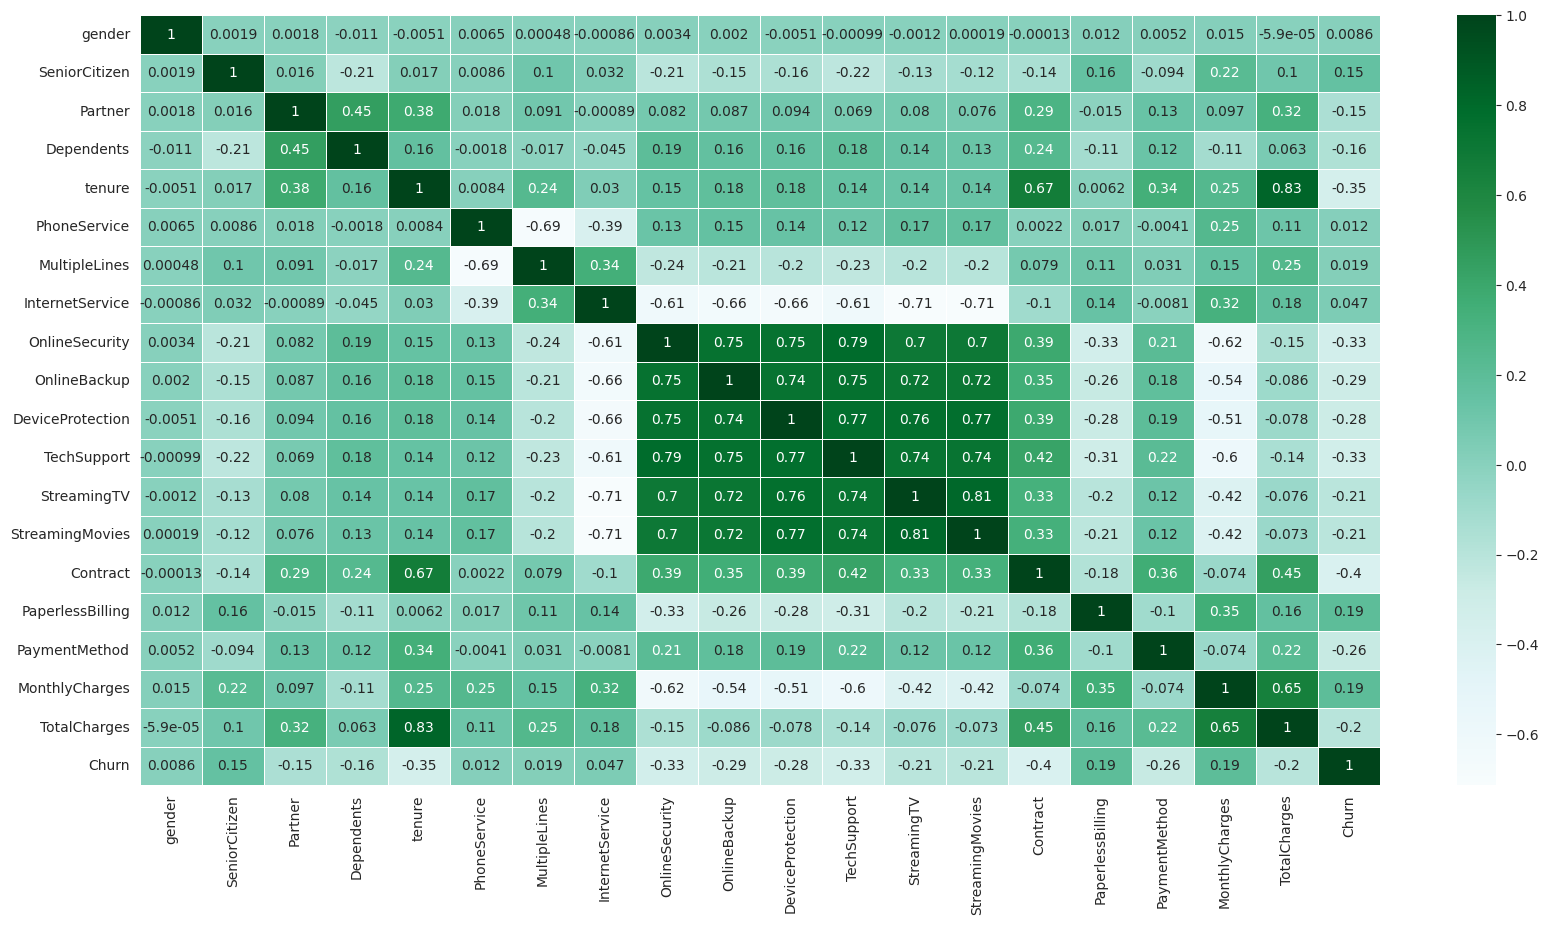

In [ ]:
# heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True,linewidths=.5, cmap='BuGn')

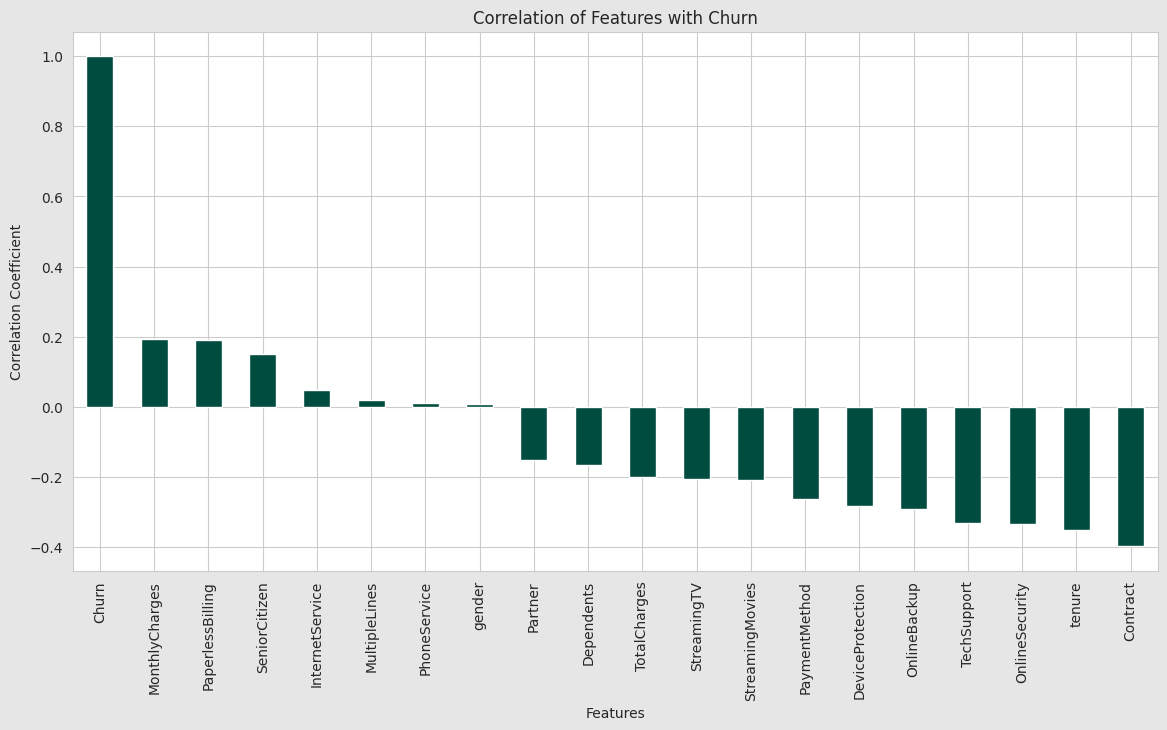

In [ ]:
import matplotlib.pyplot as plt

# Your code for plotting
plt.figure(figsize=(14, 7), facecolor='#E6E6E6')  # Set figure background to #E6E6E6
df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', color='#004D40')  # Dark teal color

plt.title('Correlation of Features with Churn')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

# Models:


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import f1_score, precision_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Project/WA_Fn-UseC_-Telco-Customer-Churn.csv')
# Drop the 'Column1' column
df = df.drop(columns=['Column1'])

# Display the first few rows to confirm the column has been removed
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
# Initialize LabelEncoders for categorical columns
encs = {}
for catcol in [col for col in df.columns if df[col].dtype == 'object']:
    encs[catcol] = LabelEncoder()
    df[catcol] = encs[catcol].fit_transform(df[catcol])
    print(f"Encoded values for column '{catcol}':")
    for label, value in zip(encs[catcol].classes_, encs[catcol].transform(encs[catcol].classes_)):
        print(f"  Label: {label}, Encoded Value: {value}")

# Shuffle the dataset
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Calculate the split index for training and testing (80% training, 20% testing)
split_index = int(0.8 * len(df_shuffled))

Encoded values for column 'gender':
  Label: Female, Encoded Value: 0
  Label: Male, Encoded Value: 1
Encoded values for column 'Partner':
  Label: No, Encoded Value: 0
  Label: Yes, Encoded Value: 1
Encoded values for column 'Dependents':
  Label: No, Encoded Value: 0
  Label: Yes, Encoded Value: 1
Encoded values for column 'PhoneService':
  Label: No, Encoded Value: 0
  Label: Yes, Encoded Value: 1
Encoded values for column 'MultipleLines':
  Label: No, Encoded Value: 0
  Label: No phone service, Encoded Value: 1
  Label: Yes, Encoded Value: 2
Encoded values for column 'InternetService':
  Label: DSL, Encoded Value: 0
  Label: Fiber optic, Encoded Value: 1
  Label: No, Encoded Value: 2
Encoded values for column 'OnlineSecurity':
  Label: No, Encoded Value: 0
  Label: No internet service, Encoded Value: 1
  Label: Yes, Encoded Value: 2
Encoded values for column 'OnlineBackup':
  Label: No, Encoded Value: 0
  Label: No internet service, Encoded Value: 1
  Label: Yes, Encoded Value: 2
E

In [38]:
# Split the data into train (80%) and test (20%)
train_df = df_shuffled[:split_index]
test_df = df_shuffled[split_index:]

# Further split the train_df into train (80% of train_df) and validation (20% of train_df)
split_index_val = int(0.8 * len(train_df))
train_data = train_df[:split_index_val]
val_data = train_df[split_index_val:]

# Output the sizes of each set
print(f"Train set size: {train_data.shape}")
print(f"Validation set size: {val_data.shape}")
print(f"Test set size: {test_df.shape}")

Train set size: (4507, 20)
Validation set size: (1127, 20)
Test set size: (1409, 20)


In [39]:
# Assuming 'Churn' is the target column, and the rest are features
target_column = 'Churn'

# Prepare the training data (separate features and target)
X_train = train_data.drop(columns=[target_column])
y_train = train_data[target_column]

# Prepare the testing and validation data
X_val = val_data.drop(columns=[target_column])
y_val = val_data[target_column]
X_test = test_df.drop(columns=[target_column])
y_test = test_df[target_column]

In [40]:
#scalling for x
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [41]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=50)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200,500],         # Number of trees
    'max_depth': [10, 20, None],            # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]              # Whether to use bootstrap samples when building trees
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=5,              # 5-fold cross-validation
                           scoring='accuracy', # Use accuracy to evaluate models
                           verbose=2,          # Print details while running
                           n_jobs=-1)          # Use all processors


# Perform grid search on the training set
grid_search.fit(X_train, y_train)

# Output the best hyperparameters from the grid search
print("Best Hyperparameters:", grid_search.best_params_)



Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}


In [42]:
# Best model after grid search
best_rf_model = grid_search.best_estimator_

# Align the columns between train and test/validation sets (in case any column is missing)
#X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
#X_train, X_val = X_train.align(X_val, join='left', axis=1, fill_value=0)

# Make predictions on the validation set
y_val_pred = best_rf_model.predict(X_val)

# Make predictions on the test set
y_test_pred = best_rf_model.predict(X_test)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))


Validation Accuracy: 0.8057
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       836
           1       0.66      0.50      0.57       291

    accuracy                           0.81      1127
   macro avg       0.75      0.71      0.72      1127
weighted avg       0.79      0.81      0.80      1127

Test Accuracy: 0.7984
Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1052
           1       0.64      0.47      0.54       357

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [43]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Project/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Drop the first column if necessary (Column1 or Unnamed: 0)
df = df.drop(columns=['Column1'], errors='ignore')

# Initialize LabelEncoders for categorical columns
encs = {}
for catcol in [col for col in df.columns if df[col].dtype == 'object']:
    encs[catcol] = LabelEncoder()
    df[catcol] = encs[catcol].fit_transform(df[catcol])

# Shuffle the dataset
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Calculate the split index for training and testing (80% training, 20% testing)
split_index = int(0.8 * len(df_shuffled))

# Split the data into train (80%) and test (20%)
train_df = df_shuffled[:split_index]
test_df = df_shuffled[split_index:]

# Further split the train_df into train (80% of train_df) and validation (20% of train_df)
split_index_val = int(0.8 * len(train_df))
train_data = train_df[:split_index_val]
val_data = train_df[split_index_val:]

# Assuming 'Churn' is the target column, and the rest are features
target_column = 'Churn'

# Prepare the training data (separate features and target)
X_train = train_data.drop(columns=[target_column])
y_train = train_data[target_column]

# Prepare the testing and validation data
X_val = val_data.drop(columns=[target_column])
y_val = val_data[target_column]
X_test = test_df.drop(columns=[target_column])
y_test = test_df[target_column]

# Align columns between train and test/validation sets
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
X_train, X_val = X_train.align(X_val, join='left', axis=1, fill_value=0)

# Initialize the RandomForestClassifier with the updated parameters
rf_model = RandomForestClassifier(n_estimators=500,
                                  oob_score=True,
                                  n_jobs=-1,
                                  random_state=50,
                                  max_features="sqrt",  # Changed from 'auto' to 'sqrt'
                                  max_leaf_nodes=30)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Evaluate OOB (Out-of-Bag) score
print(f"OOB Score: {rf_model.oob_score_:.4f}")

# Make predictions on the validation set
y_val_pred = rf_model.predict(X_val)

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))


OOB Score: 0.7999
Validation Accuracy: 0.7950
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       836
           1       0.64      0.48      0.55       291

    accuracy                           0.80      1127
   macro avg       0.74      0.69      0.71      1127
weighted avg       0.78      0.80      0.78      1127

Test Accuracy: 0.8091
Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      1052
           1       0.68      0.46      0.55       357

    accuracy                           0.81      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.80      0.81      0.80      1409



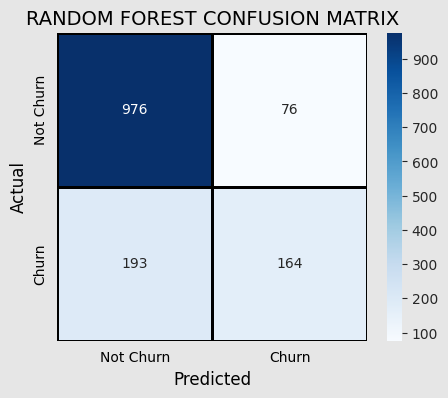

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test_lr and y_test_lr_pred are defined
plt.figure(figsize=(5, 4), facecolor='#E6E6E6')  # Set figure background to #E6E6E6

# Create the heatmap
sns.heatmap(confusion_matrix(y_test, y_test_pred),
                annot=True, fmt="d", cmap='Blues', linecolor="k", linewidths=0.9,
                xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])

# Set titles and labels with dark color for contrast
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14, color='black')
plt.xlabel('Predicted', fontsize=12, color='black')
plt.ylabel('Actual', fontsize=12, color='black')
# Change the color of the ticks to black
plt.tick_params(colors='black')

plt.show()

In [ ]:
import joblib

# Save the trained model
joblib.dump(rf_model, 'random_forest_model.pkl')

# Save the label encoders
joblib.dump(encs, 'label_encoders.pkl')


['label_encoders.pkl']

logistic reg


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import f1_score, precision_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [46]:
# Split the data into train (80%) and test (20%)
train_df_lr = df_shuffled[:split_index]
test_df_lr = df_shuffled[split_index:]

# Further split the train_df into train (80% of train_df) and validation (20% of train_df)
split_index_val = int(0.8 * len(train_df_lr))
x_train_lr = train_df_lr[:split_index_val]
x_val_lr = train_df_lr[split_index_val:]

# Assuming 'Churn' is the target column, and the rest are features
target_column_lr = 'Churn'

# Prepare the training data (separate features and target)
x_train_lr_features = x_train_lr.drop(columns=[target_column_lr])
y_train_lr = x_train_lr[target_column_lr]

# Prepare the validation and test data
x_val_lr_features = x_val_lr.drop(columns=[target_column_lr])
y_val_lr = x_val_lr[target_column_lr]
x_test_lr_features = test_df_lr.drop(columns=[target_column_lr])
y_test_lr = test_df_lr[target_column_lr]

# Align columns between train and test/validation sets
x_train_lr_features, x_test_lr_features = x_train_lr_features.align(x_test_lr_features, join='left', axis=1, fill_value=0)
x_train_lr_features, x_val_lr_features = x_train_lr_features.align(x_val_lr_features, join='left', axis=1, fill_value=0)

In [47]:
# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=50, max_iter=1000)

# Define the hyperparameters grid for tuning
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],       # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization types
    'solver': ['liblinear', 'saga'],     # Solvers compatible with l1 or l2
}

# Set up GridSearchCV
grid_search_lr = GridSearchCV(estimator=lr_model,
                              param_grid=param_grid_lr,
                              cv=5,               # 5-fold cross-validation
                              scoring='accuracy', # Use accuracy to evaluate models
                              verbose=2,          # Print details while running
                              n_jobs=-1)          # Use all processors

# Perform grid search on the training set
grid_search_lr.fit(x_train_lr_features, y_train_lr)

# Output the best hyperparameters from the grid search
print("Best Hyperparameters:", grid_search_lr.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

In [48]:
# Best model after grid search
best_lr_model = grid_search_lr.best_estimator_

# Make predictions on the validation set using the best logistic regression model
y_val_lr_pred = best_lr_model.predict(x_val_lr_features)

# Make predictions on the test set using the best logistic regression model
y_test_lr_pred = best_lr_model.predict(x_test_lr_features)

# Evaluate the model on the validation set
val_accuracy_lr = accuracy_score(y_val_lr, y_val_lr_pred)
print(f"Validation Accuracy: {val_accuracy_lr:.4f}")
print("Validation Classification Report:\n", classification_report(y_val_lr, y_val_lr_pred))

# Evaluate the model on the test set
test_accuracy_lr = accuracy_score(y_test_lr, y_test_lr_pred)
print(f"Test Accuracy: {test_accuracy_lr:.4f}")
print("Test Classification Report:\n", classification_report(y_test_lr, y_test_lr_pred))

Validation Accuracy: 0.7853
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       836
           1       0.60      0.52      0.55       291

    accuracy                           0.79      1127
   macro avg       0.72      0.70      0.71      1127
weighted avg       0.78      0.79      0.78      1127

Test Accuracy: 0.8020
Test Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1052
           1       0.63      0.53      0.58       357

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.80      1409



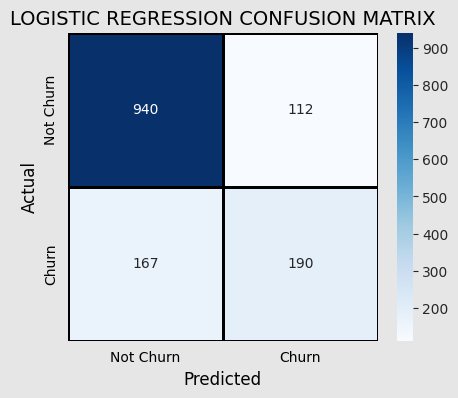

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test_lr and y_test_lr_pred are defined
plt.figure(figsize=(5, 4), facecolor='#E6E6E6')  # Set figure background to #E6E6E6

# Create the heatmap
sns.heatmap(confusion_matrix(y_test_lr, y_test_lr_pred),
                annot=True, fmt="d", cmap='Blues', linecolor="k", linewidths=0.9,
                xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])

# Set titles and labels with dark color for contrast
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX", fontsize=14, color='black')
plt.xlabel('Predicted', fontsize=12, color='black')
plt.ylabel('Actual', fontsize=12, color='black')
# Change the color of the ticks to black
plt.tick_params(colors='black')

plt.show()

<ipython-input-51-12b4acb13ec9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rates_by_senior.index, y=churn_rates_by_senior.values, palette= 'Blues')


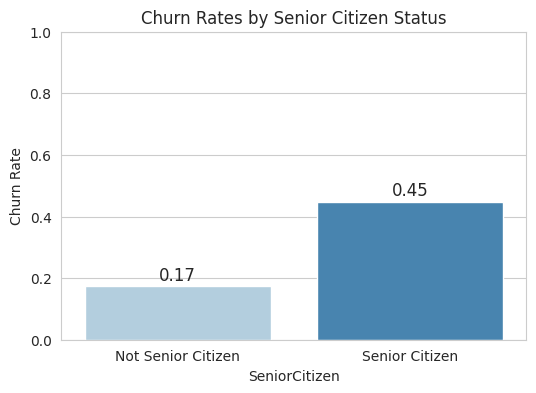

In [51]:
# Calculate the proportion of customers predicted to churn and not churn for each SeniorCitizen group
x_test_lr_features['PredictedChurn'] = y_test_lr_pred
churn_rates_by_senior = x_test_lr_features.groupby('SeniorCitizen')['PredictedChurn'].mean()

# Plot the churn rates for SeniorCitizen = 0 (non-senior) and SeniorCitizen = 1 (senior)
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_rates_by_senior.index, y=churn_rates_by_senior.values, palette= 'Blues')

# Add labels and title
plt.title('Churn Rates by Senior Citizen Status')

plt.ylabel('Churn Rate')
plt.ylim(0, 1)  # Limit y-axis to 0-1 for percentage scale
plt.xticks([0, 1], ['Not Senior Citizen', 'Senior Citizen'])

# Show values on bars
for i, v in enumerate(churn_rates_by_senior):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', fontsize=12)

plt.show()

In [ ]:
import joblib

# save model with joblib
filename = 'joblib_model.sav_lr'
joblib.dump(grid_search_lr, filename)

['joblib_model.sav_lr']

In [ ]:
# load model with joblib
loaded_model = joblib.load(filename)

# evaluate model
y_predict = grid_search_lr.predict(X_test)

# check results
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1052
           1       0.63      0.53      0.58       357

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.80      1409



SVM

In [52]:
from sklearn.svm import SVC

# Split the data into train (80%) and test (20%)
train_df_svm = df_shuffled[:split_index]
test_df_svm = df_shuffled[split_index:]

# Further split the train_df into train (80% of train_df) and validation (20% of train_df)
split_index_val = int(0.8 * len(train_df_svm))
x_train_svm = train_df_svm[:split_index_val]
x_val_svm = train_df_svm[split_index_val:]

# Assuming 'Churn' is the target column, and the rest are features
target_column_svm = 'Churn'

# Prepare the training data (separate features and target)
x_train_svm_features = x_train_svm.drop(columns=[target_column_svm])
y_train_svm = x_train_svm[target_column_svm]

# Prepare the validation and test data
x_val_svm_features = x_val_svm.drop(columns=[target_column_svm])
y_val_svm = x_val_svm[target_column_svm]
x_test_svm_features = test_df_svm.drop(columns=[target_column_svm])
y_test_svm = test_df_svm[target_column_svm]

# Align columns between train and test/validation sets
x_train_svm_features, x_test_svm_features = x_train_svm_features.align(x_test_svm_features, join='left', axis=1, fill_value=0)
x_train_svm_features, x_val_svm_features = x_train_svm_features.align(x_val_svm_features, join='left', axis=1, fill_value=0)

In [53]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')  # You can try 'rbf', 'poly', or other kernels

# Train the model on the training set
svm_classifier.fit(x_val_svm_features, y_val_svm)

SVC(kernel='linear')

In [54]:
y_test_pred_svm = svm_classifier.predict(x_test_svm_features)
y_val_pred_svm = svm_classifier.predict(x_val_svm_features)


In [55]:
# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val_svm, y_val_pred_svm)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print("Validation Classification Report:\n", classification_report(y_val_svm, y_val_pred_svm))

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test_svm, y_test_pred_svm)
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Test Classification Report:\n", classification_report(y_test_svm, y_test_pred_svm))

Validation Accuracy: 0.7959
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87       836
           1       0.67      0.41      0.51       291

    accuracy                           0.80      1127
   macro avg       0.75      0.67      0.69      1127
weighted avg       0.78      0.80      0.78      1127

Test Accuracy: 0.8048
Test Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      1052
           1       0.71      0.39      0.50       357

    accuracy                           0.80      1409
   macro avg       0.76      0.67      0.69      1409
weighted avg       0.79      0.80      0.78      1409



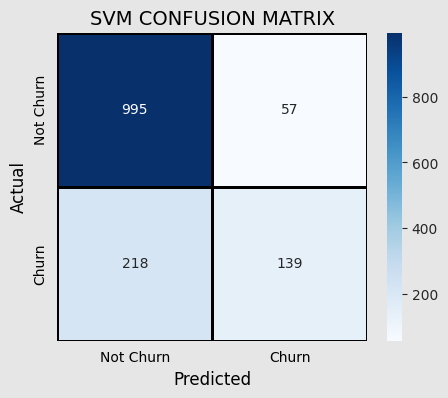

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test_lr and y_test_lr_pred are defined
plt.figure(figsize=(5, 4), facecolor='#E6E6E6')  # Set figure background to #E6E6E6

# Create the heatmap
sns.heatmap(confusion_matrix(y_test_svm, y_test_pred_svm),
                annot=True, fmt="d", cmap='Blues', linecolor="k", linewidths=0.9,
                xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])

# Set titles and labels with dark color for contrast
plt.title("SVM CONFUSION MATRIX", fontsize=14, color='black')
plt.xlabel('Predicted', fontsize=12, color='black')
plt.ylabel('Actual', fontsize=12, color='black')
# Change the color of the ticks to black
plt.tick_params(colors='black')

plt.show()

In [58]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_test, and y_test are already defined

# Initialize the SVM classifier
svm_classifier = SVC(random_state=50)

# Perform 5-fold cross-validation on the training data
cv_scores = cross_val_score(svm_classifier, x_train_svm_features, y_train_svm, cv=5, scoring='accuracy')

# Output the cross-validation scores and their mean
print("Cross-Validation Scores:", cv_scores)
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.2f}")

# Train the model on the entire training data after cross-validation
svm_classifier.fit(x_train_svm_features, y_train_svm)

# Test the model on the test set
y_test_pred = svm_classifier.predict(x_test_svm_features)
test_accuracy = accuracy_score(y_test_svm, y_test_pred_svm)
print(f"Test Accuracy: {test_accuracy:.2f}")

Cross-Validation Scores: [0.72838137 0.72949002 0.72918979 0.72918979 0.72918979]
Mean Cross-Validation Accuracy: 0.73
Test Accuracy: 0.80


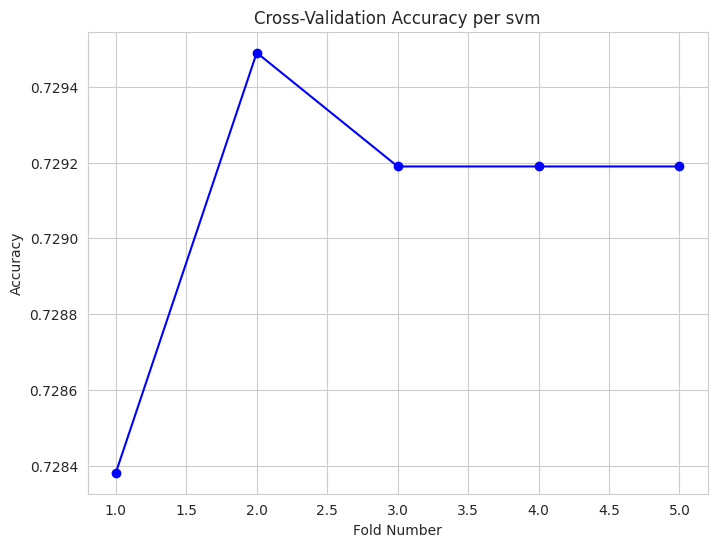

In [59]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='b')

plt.title('Cross-Validation Accuracy per svm')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 640x480 with 0 Axes>

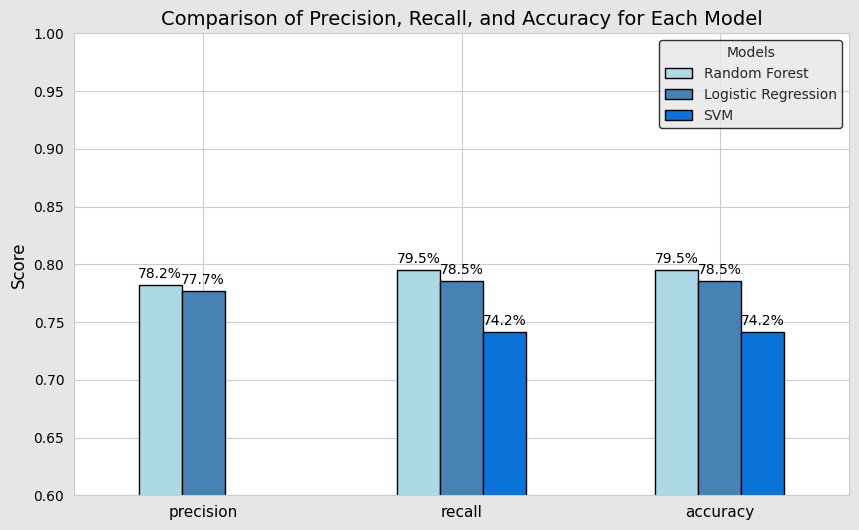

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report

# Get classification reports for each model
rf_report = classification_report(y_val, y_val_pred, output_dict=True)
lr_report = classification_report(y_val_lr, grid_search_lr.best_estimator_.predict(x_val_lr_features), output_dict=True)
svm_report = classification_report(y_val_svm, svm_classifier.predict(x_val_svm_features), output_dict=True)

# Extract accuracy, precision, and recall from the reports
metrics = ['precision', 'recall', 'accuracy']

# Prepare a list to store the data
model_metrics = {
    'Random Forest': [rf_report['weighted avg']['precision'], rf_report['weighted avg']['recall'], rf_report['accuracy']],
    'Logistic Regression': [lr_report['weighted avg']['precision'], lr_report['weighted avg']['recall'], lr_report['accuracy']],
    'SVM': [svm_report['weighted avg']['precision'], svm_report['weighted avg']['recall'], svm_report['accuracy']]
}

# Convert to a dataframe for easier plotting
metrics_df = pd.DataFrame(model_metrics, index=metrics)

# Set the overall background color to #E6E6E6
plt.figure(facecolor='#E6E6E6')

# Define a gradient of orange shades
colors = ['#ADD8E6', '#4682B4', '#0A74DA']  # Lighter to darker blue tones

# Plot the metrics
ax = metrics_df.plot(kind='bar', figsize=(10, 6), color=colors, edgecolor='black')

# Set titles and labels with contrasting color
plt.title('Comparison of Precision, Recall, and Accuracy for Each Model', fontsize=14, color='black')
plt.ylabel('Score', fontsize=12, color='black')
plt.xticks(rotation=0, fontsize=11, color='black')
plt.yticks(color='black')

# Adjust the y-axis range to be between 0.6 and 1
plt.ylim(0.6, 1)

# Set the legend title and labels with contrasting color
plt.legend(title='Models', facecolor='#E6E6E6', edgecolor='black')

# Annotate each bar with the percentage value
for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.1f}%',   # Convert to percentage
                (p.get_x() + p.get_width() / 2., p.get_height()),   # Position the label
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Set the background color of the plot (axes) area and the figure itself to #E6E6E6
plt.gcf().set_facecolor('#E6E6E6')

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

<Figure size 640x480 with 0 Axes>

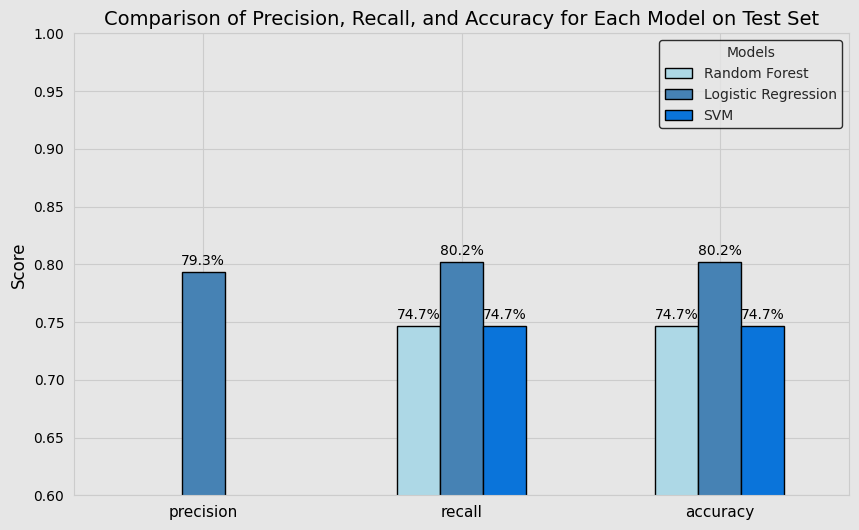

In [61]:
# Get classification reports for each model on the test set
rf_test_report = classification_report(y_test, y_test_pred, output_dict=True)
lr_test_report = classification_report(y_test_lr, y_test_lr_pred, output_dict=True)
svm_test_report = classification_report(y_test_svm, svm_classifier.predict(x_test_svm_features), output_dict=True)

# Extract accuracy, precision, and recall for test set from the reports
metrics = ['precision', 'recall', 'accuracy']

# Prepare a list to store the test data
test_model_metrics = {
    'Random Forest': [rf_test_report['weighted avg']['precision'], rf_test_report['weighted avg']['recall'], rf_test_report['accuracy']],
    'Logistic Regression': [lr_test_report['weighted avg']['precision'], lr_test_report['weighted avg']['recall'], lr_test_report['accuracy']],
    'SVM': [svm_test_report['weighted avg']['precision'], svm_test_report['weighted avg']['recall'], svm_test_report['accuracy']]
}

# Convert to a dataframe for easier plotting
test_metrics_df = pd.DataFrame(test_model_metrics, index=metrics)

# Set the overall background color to #E6E6E6
plt.figure(facecolor='#E6E6E6')

# Define a gradient of orange shades
colors = ['#ADD8E6', '#4682B4', '#0A74DA']  # Lighter to darker blue tones

# Plot the test metrics
ax = test_metrics_df.plot(kind='bar', figsize=(10, 6), color=colors, edgecolor='black')

# Set the background color of the plot area to #E6E6E6
ax.set_facecolor('#E6E6E6')

# Set titles and labels with contrasting color
plt.title('Comparison of Precision, Recall, and Accuracy for Each Model on Test Set', fontsize=14, color='black')
plt.ylabel('Score', fontsize=12, color='black')
plt.xticks(rotation=0, fontsize=11, color='black')
plt.yticks(color='black')

# Adjust the y-axis range to be between 0.6 and 1
plt.ylim(0.6, 1)

# Set the legend title and labels with contrasting color
plt.legend(title='Models', facecolor='#E6E6E6', edgecolor='black')

# Annotate each bar with the percentage value
for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.1f}%',   # Convert to percentage
                (p.get_x() + p.get_width() / 2., p.get_height()),   # Position the label
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Set the background color of the plot (axes) area and the figure itself to #E6E6E6
plt.gcf().set_facecolor('#E6E6E6')

# Show the plot
plt.show()